In [1]:
maxiter = 5000

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import gpitch.myplots as mplt
import numpy as np
import gpflow
import gpitch
import time
import tensorflow as tf
# from gpitch.models import GpitchModel
from gpitch.transcription_svi import AmtSvi

In [4]:
path_test = '/import/c4dm-01/MAPS_original/AkPnBcht/MUS/'
path_train = '/import/c4dm-01/MAPS_original/AkPnBcht/ISOL/NO/'
path_load = '/import/c4dm-04/alvarado/results/amt/params/'
fname = 'MAPS_MUS-bach_846_AkPnBcht.wav'

In [5]:
path = [path_train, path_test, path_load]
frames = [88200, 5*44100]  # train and test number of frames

In [6]:
m = AmtSvi(test_fname=fname, frames=frames, path=path, reg=False, gpu='0')
m.model.za.fixed = True
m.model.zc.fixed = True
print("number of induncing variables: {0}".format(len(m.model.za[0].value)))

number of induncing variables: 204


In [7]:
m.pitches

[60, 62, 64, 67, 69, 72, 74, 76, 77]

(-0.5, 99.5, 87.5, -0.5)

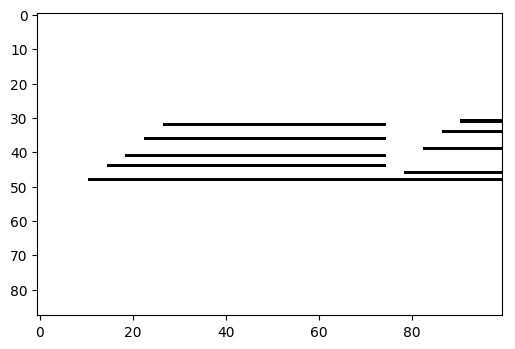

In [8]:
plt.figure()
plt.imshow(m.piano_roll.matrix, cmap=plt.cm.get_cmap('binary'))
plt.axis("auto")

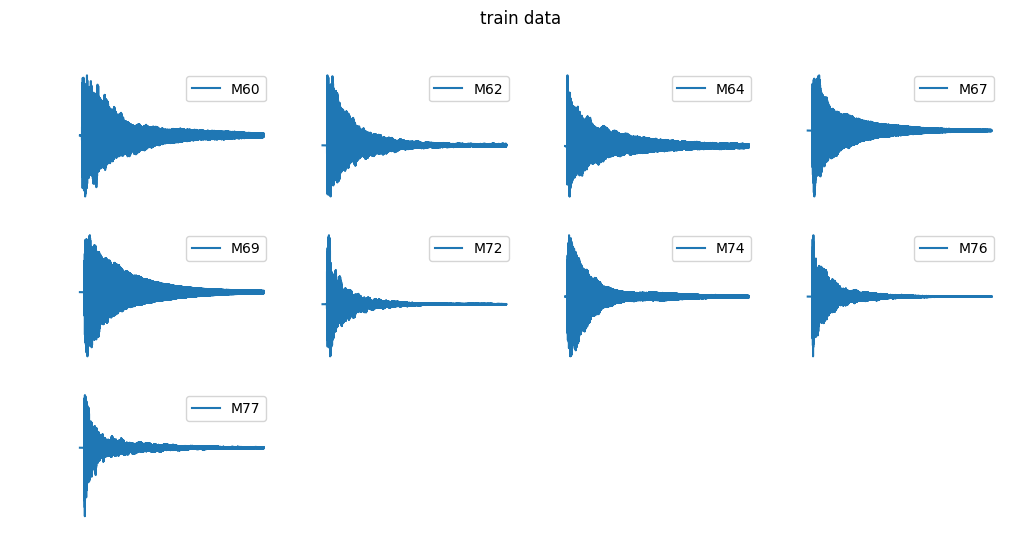

In [9]:
m.plot_data_train()

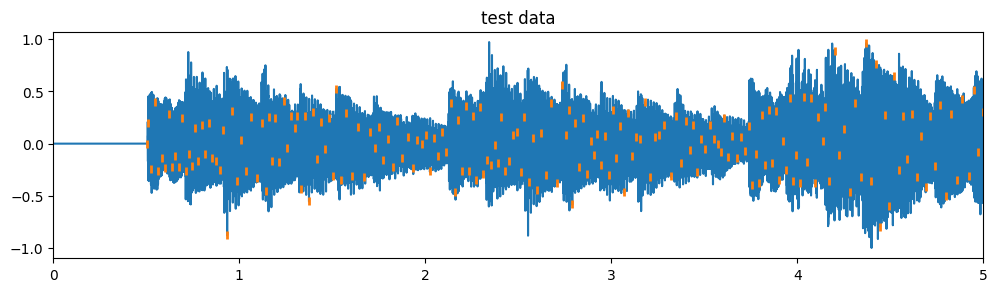

In [ ]:
m.plot_data_test()

In [ ]:
m.optimize(maxiter=maxiter, learning_rate=0.005)

In [ ]:
plt.plot(m.logger.array())

In [ ]:
m.predict()

In [ ]:
m.plot_results()